## Multiple linear regression with statsmodels

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as eval_measures
import scipy.stats as stats
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import datasets, model_selection

We load the boston house-prices dataset and `X` are our features and `y` is the target variable `medv` (Median value of owner-occupied homes in $1000s).

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's split the data in a test and training set.

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

## Fitting models - the standard way
### Full model without an intercept


In [4]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              565.2
Date:                Sat, 20 Feb 2021   Prob (F-statistic):                   1.12e-221
Time:                        23:49:36   Log-Likelihood:                         -1078.6
No. Observations:                 354   AIC:                                      2183.
Df Residuals:                     341   BIC:                                      2234.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

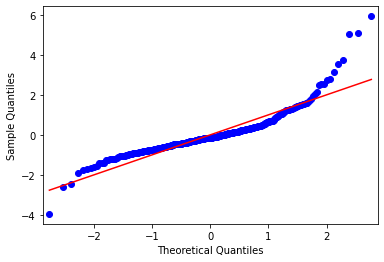

In [5]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [6]:
result.pvalues < 0.05

CRIM       False
ZN          True
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS         True
RAD        False
TAX        False
PTRATIO     True
B           True
LSTAT       True
dtype: bool

In [7]:
print("rsquared: {}".format(result.rsquared))
print("mse: {}".format(eval_measures.mse(y_train, result.fittedvalues)))
print("rmse: {}".format(eval_measures.rmse(y_train, result.fittedvalues)))

rsquared: 0.9556498929752535
mse: 25.944610904187666
rmse: 5.093585270140048


### Full model with an intercept


In [8]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     66.50
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           4.82e-85
Time:                        23:49:36   Log-Likelihood:                -1059.4
No. Observations:                 354   AIC:                             2147.
Df Residuals:                     340   BIC:                             2201.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.2050      6.122      6.241      0.0

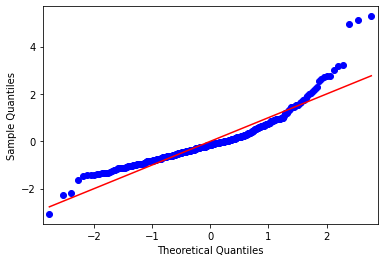

In [9]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [10]:
print("rsquared: {}".format(result.rsquared))
print("mse: {}".format(eval_measures.mse(y_train, result.fittedvalues)))
print("rmse: {}".format(eval_measures.rmse(y_train, result.fittedvalues)))

rsquared: 0.7177180199132047
mse: 23.27786907041852
rmse: 4.824714402989935


## Fitting models using R-style formulas
We can also fit a model with the R syntax `y ~ x_1 + x_2` and build some complexer models.

In [11]:
dat = X_train.copy()
dat['MEDV'] = y_train
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
481,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74,23.7
432,6.44405,0.0,18.10,0.0,0.584,6.425,74.8,2.2004,24.0,666.0,20.2,97.95,12.03,16.1
214,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55,23.7


### Full model with an intercept

In [12]:
result = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     54.65
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           6.18e-72
Time:                        23:49:36   Log-Likelihood:                -1093.4
No. Observations:                 354   AIC:                             2213.
Df Residuals:                     341   BIC:                             2263.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.8196      6.466      3.684      0.0

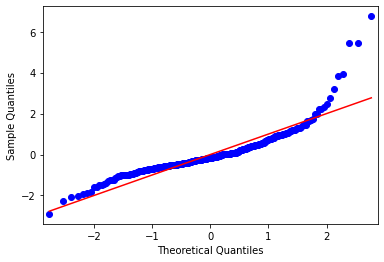

In [13]:
fig = sm.qqplot(result.resid, fit=True, line="s")

plt.show()

In [14]:
print("rsquared: {}".format(result.rsquared))
print("mse: {}".format(eval_measures.mse(y_train, result.fittedvalues)))
print("rmse: {}".format(eval_measures.rmse(y_train, result.fittedvalues)))

rsquared: 0.6578853414251402
mse: 28.211861865670137
rmse: 5.311483960784419


### Model with a polynomial and the target variable log transformed

In [15]:
result = smf.ols('np.log(MEDV) ~ CRIM + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + pow(AGE, 2)', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     75.59
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           1.65e-80
Time:                        23:49:36   Log-Likelihood:                 20.427
No. Observations:                 354   AIC:                            -18.85
Df Residuals:                     343   BIC:                             23.71
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3940      0.277     12.257      

Let's plot the QQ-Plot for the residuals

In [16]:
result.pvalues < 0.05

Intercept      True
CRIM           True
CHAS           True
NOX            True
RM             True
DIS            True
RAD            True
TAX            True
PTRATIO        True
B              True
pow(AGE, 2)    True
dtype: bool

In [17]:
print("rsquared: {}".format(result.rsquared))
print("mse: {}".format(eval_measures.mse(np.log(y_train), result.fittedvalues)))
print("rmse: {}".format(eval_measures.rmse(np.log(y_train), result.fittedvalues)))

rsquared: 0.687856214760986
mse: 0.052168229658311936
rmse: 0.2284036550896503


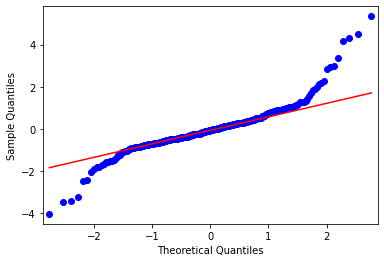

In [18]:
fig = sm.qqplot(result.resid, fit=True, line="q")
plt.show()